**Support Vector Machines (SVMs)** are a type of machine learning algorithm used for classification and regression analysis. In particular, linear SVMs are used for binary classification problems where the goal is to separate two classes by a hyperplane.

The hyperplane is a line that divides the feature space into two regions. The SVM algorithm tries to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the closest points from each class. The points closest to the hyperplane are called support vectors and play a crucial role in the algorithm's optimization process.

```
condition = y_minus_one_and_one[idx] * (np.dot(SAMPLE, W)  -  b) >= 1

if condition:
  W -= lr * (2 *  lambda  * W)
else:
  W -= lr * (2 *  lambda  * W - np.dot(SAMPLE, y_minus_one_and_one[idx]))
  b -= lr * y_minus_one_and_one[idx]

```





In [37]:
import numpy as np

class SVM:
    def __init__(self, lr=0.01, n_iter=10, lambda_param=0.01):
      self.w = None
      self.b = None
      self.lambda_param = lambda_param
      self.lr = lr
      self.n_iter = n_iter

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        y_minus_one_and_one = np.where(Y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        # gradient descent
        for _ in range(self.n_iter):
          for idx, sample in enumerate(X):
            condition = y_minus_one_and_one[idx] * (np.dot(sample, self.w)  -  self.b) >= 1

            if condition:
                self.w -= self.lr * (2 * self.lambda_param * self.w)
            else:
                self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(sample, y_minus_one_and_one[idx]))
                self.b -= self.lr * y_minus_one_and_one[idx]

    def predict(self, X_test):
        linear_output = np.dot(X_test, self.w) - self.b
        return np.sign(linear_output)


In [38]:
# Example usage
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification


X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVM(
    lr = 0.001,
    lambda_param = 0.01,
    n_iter = 1000,
)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


<ipython-input-43-b9c0136d641b>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], c='b', label='True Label -1', cmap='viridis')
<ipython-input-43-b9c0136d641b>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='g', label='True Label 1', cmap='viridis')


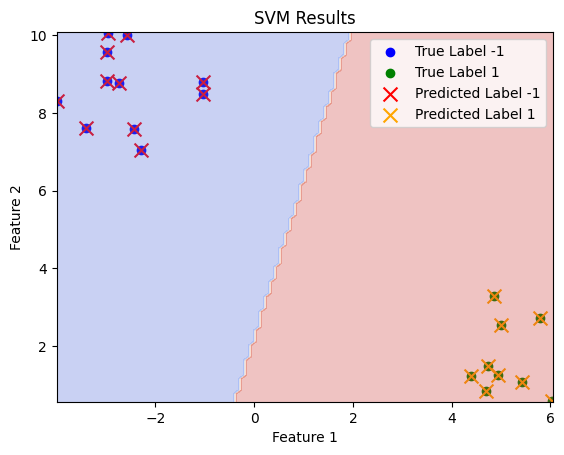

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Create scatter plots of the test data with colored points representing the true and predicted labels
fig, ax = plt.subplots()

# Plot true labels
scatter1 = ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], c='b', label='True Label -1', cmap='viridis')
scatter2 = ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='g', label='True Label 1', cmap='viridis')

# Plot predicted labels
scatter4 = ax.scatter(X_test[y_pred == -1, 0], X_test[y_pred == -1, 1], c='r', marker='x', s=100, label='Predicted Label -1')
scatter5 = ax.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='orange', marker='x', s=100, label='Predicted Label 1')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVM Results')
handles = [scatter1, scatter2, scatter4, scatter5]
labels = [h.get_label() for h in handles]
ax.legend(handles=handles, labels=labels)

# Set the limits of the axes to include all points
ax.set_xlim(X_test[:, 0].min() - 0.01, X_test[:, 0].max() + 0.01)
ax.set_ylim(X_test[:, 1].min() - 0.01, X_test[:, 1].max() + 0.01)

plt.show()